In [1]:
# Importações
import pandas as pd
import matplotlib as ml
import numpy as np
import math as mt
import pprint
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
pp = pprint.PrettyPrinter(width=1000, compact=True)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',50)
import time

In [2]:
#Leitura dos dados
colunas=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/har_smartphone/features.txt",delim_whitespace=True,header=None)
colunas=colunas[0].astype(str)+"-"+colunas[1]
colunas=colunas.values.tolist()
x_treino_df=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/har_smartphone/X_train.txt",names=colunas,delim_whitespace=True)
x_teste_df=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/har_smartphone/X_test.txt",names=colunas,delim_whitespace=True)
y_treino_df=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/har_smartphone/y_train.txt",names=['Label'],delim_whitespace=True)
y_teste_df=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/har_smartphone/y_test.txt",names=['Label'],delim_whitespace=True)

In [3]:
#Standarlizando os dados
def dataframe_stand(x):
  return (x-x.mean(axis=0))/x.std(axis=0)

x_treino_df_stand=dataframe_stand(x_treino_df).copy()
x_teste_df_stand=dataframe_stand(x_teste_df).copy()


In [5]:
def distance_func(x,y):
    dist=np.sqrt(np.sum((x-y)**2,axis=1))
    return dist

numero_classes=6
numero_maximo_k=100

# numero_amostras=40
numero_amostras=len(x_teste_df)

#Gerando o dataframe com o relatório
colunas=[]
for k in range(1,numero_maximo_k+1) :
     colum_name='k='+str(k)
     colunas.append(colum_name)   
relatorio=pd.DataFrame(columns=colunas)


import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

block = int(round(bar_length * progress))

clear_output(wait = True)
text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
print(text)
    
    


start=time.time()
for t in range(0,numero_amostras):
    #Calcula a distancia e ordena do menor pro maior
    dist=distance_func(x_treino_df_stand.values,x_teste_df_stand.values[t,:])
    dist_df=pd.DataFrame(dist,columns=['Dist'])
    dist_df['Label']=y_treino_df['Label']
    dist_df=dist_df.sort_values(by=['Dist'])
#     print(dist_df.head(numero_maximo_k))
    dist_df_lista=dist_df.head(numero_maximo_k)['Label'].to_list()
#     if (t%(numero_amostras//25)==0):
#         print("{} %".format((t/numero_amostras*100)))
#         print("Tempo execução:{}".format(time.time()-start))
#     #Para cada k
#     print("Amostra:{}".format(t+1))
    for k in range(1,numero_maximo_k+1):
#         print("Numero de vizinhos:{}".format(k))
        votos_classe=np.zeros(numero_classes)
        #Rodando dentro do subvetor
        for i in range(1,k+1):
#             print(i)
            votos_classe[dist_df_lista[i-1]-1]+=1
#         print(votos_classe)
        relatorio.loc[t,colunas[k-1]]=np.argmax(votos_classe)+1
    update_progress(t / numero_amostras)
# print(relatorio)

NameError: name 'bar_length' is not defined

In [36]:
# relatorio.to_csv(r'C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/har_smartphone/roger.csv')
# relatorio

In [5]:
from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(y_teste_df.values, relatorio['k=50'].values))
print(metrics.classification_report(y_teste_df.values, relatorio['k=50'].values, digits=3))
print(metrics.f1_score(y_teste_df.values, relatorio['k=50'].values, average='micro'))

[[487   1   8   0   0   0]
 [ 37 432   2   0   0   0]
 [ 52  48 320   0   0   0]
 [  0   2   0 372 117   0]
 [  0   0   0  20 512   0]
 [  0   0   0   9  18 510]]
              precision    recall  f1-score   support

           1      0.845     0.982     0.909       496
           2      0.894     0.917     0.906       471
           3      0.970     0.762     0.853       420
           4      0.928     0.758     0.834       491
           5      0.791     0.962     0.869       532
           6      1.000     0.950     0.974       537

    accuracy                          0.893      2947
   macro avg      0.905     0.888     0.891      2947
weighted avg      0.903     0.893     0.893      2947

0.8934509670851712


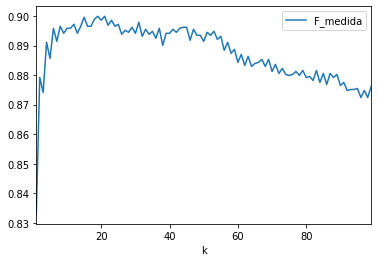

     k  F_medida
0    1  0.833051
95  96  0.872413
97  98  0.872413
2    3  0.874109
96  97  0.874788
91  92  0.874788
93  94  0.875127
92  93  0.875127
94  95  0.875467
98  99  0.876145
89  90  0.876485
85  86  0.876824
90  91  0.877503
83  84  0.877503
81  82  0.878181
1    2  0.879199
79  80  0.879199
87  88  0.879199
80  81  0.879539
77  78  0.879878
74  75  0.879878
75  76  0.880217
73  74  0.880217
88  89  0.880217
71  72  0.880556
84  85  0.880556
86  87  0.880556
76  77  0.881235
69  70  0.881235
78  79  0.881574
82  83  0.881574
72  73  0.882253
67  68  0.882932
63  64  0.882932
61  62  0.883271
70  71  0.883610
64  65  0.883950
59  60  0.884289
65  66  0.884289
68  69  0.885307
66  67  0.885307
4    5  0.885646
62  63  0.886325
60  61  0.887004
57  58  0.887343
55  56  0.888361
58  59  0.888700
37  38  0.890058
3    4  0.891076
56  57  0.891076
6    7  0.891415
49  50  0.891415
45  46  0.891754
53  54  0.892094
35  36  0.892433
54  55  0.893112
31  32  0.893112
51  52  0.8934

In [13]:
f_medida_lista=[]
for c in range(1,len(colunas)):
    f1=metrics.f1_score(y_teste_df.values, relatorio[colunas[c]].values, average='micro')
    f_medida_lista.append([c, f1])

#Gráfico 1
grafico_f_medida=pd.DataFrame(f_medida_lista,columns=['k','F_medida'])
grafico_f_medida.plot(x='k',y='F_medida')
plt.show()
f_medida_df=pd.DataFrame(f_medida_lista,columns=['k','F_medida'])
print(f_medida_df.sort_values(by='F_medida'))
print(metrics.confusion_matrix(y_teste_df.values, relatorio['k=21'].values))
print(metrics.classification_report(y_teste_df.values, relatorio['k=21'].values, digits=3))

In [14]:
from sklearn import metrics
print(np.round(metrics.f1_score([1,1,2,2,2,2,3,3,3,3], [1,3,1,2,2,3,2,3,3,3], average='macro'),4))
print(metrics.classification_report([1,1,2,2,2,2,3,3,3,3], [1,3,1,2,2,3,2,3,3,3], digits=5))
print(2*(0.58889*0.58333)/(0.58889+0.58333))

0.5794
              precision    recall  f1-score   support

           1    0.50000   0.50000   0.50000         2
           2    0.66667   0.50000   0.57143         4
           3    0.60000   0.75000   0.66667         4

    accuracy                        0.60000        10
   macro avg    0.58889   0.58333   0.57937        10
weighted avg    0.60667   0.60000   0.59524        10

0.5860968140792684


In [ ]:
classe=1
max_it=1000
pp=0.00001
passo=0.01
w_inicial=np.zeros([562,6])
w_final=np.empty([562,6])

for classe in range(1,7):
# #     w=np.ones(562)
#     w=np.empty(562)
#     w=w/1000
    y_treino_l=labelizer_func(y_treino_df.values[:,0],classe)

    #Gráfico historgrama após labelizacao
    titulo="Classe:{}".format(classe)
    pd.DataFrame(y_treino_l,columns=[titulo]).hist()

    #treino do modelo
    # grafico_custo=[]
    grafico_custo,w_final[:,classe-1],custo_final,precisao,i,mensagem=logistic_train_func(w_inicial[:,classe-1],x_treino_df_stand.values,y_treino_l,max_it,pp,passo)

    #grafico do custo
    grafico_custo=pd.DataFrame(grafico_custo,columns=['Custo'])
    plt.title(titulo)
    grafico_custo.plot()
#     plt.show()
# print(grafico_custo)
plt.show()

In [ ]:
w_final

In [ ]:
yh_teste=yh_func(x_teste_df_stand.values,w_final)
# print(x_treino_df_stand.shape)
# print(w_final.shape)
# print(yh_treino.shape)
# teste=pd.DataFrame(yh_treino,columns=['Classe1'])
# teste['Real']=y_treino_df
# teste[teste['Real']==classe]
yh_teste2=np.zeros(yh_teste.shape[0])
for i in range(0,yh_teste.shape[0]):
    yh_teste2[i]=np.where(yh_teste[i,:] == np.amax(yh_teste[i,:]))[0]+1
print(yh_teste2)
print(y_teste_df.values[:,0])
confusion_matrix(y_teste_df.values[:,0], yh_teste2, labels=[1,2,3,4,5,6])
confirmacao=pd.DataFrame(yh_teste,columns=[1,2,3,4,5,6])
confirmacao['Estimado']=yh_teste2
confirmacao['Verdadeiro']=y_teste_df['Label']

# print(confirmacao)

In [ ]:
labels = [1,2,3,4,5,6]
cm = confusion_matrix(y_teste_df.values[:,0], yh_teste2, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(sum(sum(cm)))

In [ ]:
def division_zero(a, b):
    if b:
        x=a/b
    if b==0:
        x=0
    return x

lis_treshold=np.arange(0,1+step,step)
f_medida_lista=[]
for t in lis_treshold:
    yh_teste_t=threshold_func(yh_teste,t)
    tn, fp, fn, tp=confusion_matrix(y_teste, yh_teste_t).ravel()
    recall=division_zero(tp,(tp+fn))
    precisao=division_zero(tp,fp+tp)
    a=recall*precisao
    b=recall+precisao
    f_medida=division_zero(a,b)
    f_medida_lista.append([t, f_medida])

#Gráfico 1
grafico_f_medida=pd.DataFrame(f_medida_lista,columns=['t','F_medida'])
grafico_f_medida.plot(x='t',y='F_medida')
plt.show()

#Gráfico 2
x=np.array(f_medida_lista)
x=x[:,0].copy()
y=np.array(f_medida_lista)
y=y[:,1].copy()
plt.plot(x,y,'.--')
plt.show()

In [ ]:


import sklearn as sk
from sklearn.linear_model import LogisticRegression
import pandas as pd

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(x_treino, y_treino)
yh_treino=LR.predict(x_treino)
yh_teste=LR.predict(x_teste)
print("treino")
print("tn, fp, fn, tp")
print(confusion_matrix(y_treino, yh_treino).ravel()/len(y_treino)*100)
print("teste")
print("tn, fp, fn, tp")
print(confusion_matrix(y_teste,yh_teste).ravel()/len(y_teste)*100)


def custo_func(y,yh):
#     custo=-np.sum(y_treino*np.log(yh_treino)+(1-y_treino)*np.log(1-yh_treino))/len(y)
#     return custo
    eps=1e-15
    custo=-
    yh = np.clip(yh, eps, 1 - eps)
    for i in range(0,len(y)):
        if y[i] == 1:
            custo+= -np.log(yh[i])
        else:
            custo+= -np.log(1 - yh[i])
    custo=custo/len(y)
    return custo


# teste
# import numpy as np
# from sklearn.model_selection import KFold

# X = np.array(["a", "b", "c", "d","e","f","g","h"])
# kf = KFold(n_splits=5)
# for train_index, test_index in kf.split(X):
#     print(train_index)
#     print(X[train_index])
#     print(test_index)
#     print(X[test_index])

# h=np.array([0,1,2])
# print(X[h])

#teste
# print(log_loss([1,0],[1,1]))
# print(1*np.log(1))

# algoritmo para logloss
def logloss(true_label, predicted, eps=1e-15):
  p = np.clip(predicted, eps, 1 - eps)
  print(p)
  if true_label == 1:
    return -np.log(p)
  else:
    return -np.log(1 - p)

#códigos legais
# print(x_treino.shape)
# print(w.shape[0])
# print(w.shape)
# print(len(w))



y_true = [0, 0, 1, 1]
y_pred = [0.0,0.9,0.1,0.7]
teste=0
for i in range(0,len(y_true)):
    teste+=logloss(y_true[i],y_pred[i])

teste=teste/len(y_true)
print(teste)
print(log_loss(y_true,y_pred))
np.log(0.000000000000000000000000000000000000001)

In [ ]:
# ar1=np.array([1,2,2,3])
# ar2=np.array([[1,0,0,0],[0,1,1,0],[0,0,0,1]])
# print(log_loss(ar1,ar2))

actual_labels = [1,2,3]

log_loss(actual_labels,  [[1, 0, 0], [0, 1, 0], [0, 0, 1]])

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit([1, 2, 6, 6, 2])
print(lb.classes_)
print(lb.transform([1, 6]))

In [ ]:
arr = np.array([11, 12, 13, 14, 15, 16, 17, 15, 11, 12, 14, 15, 16, 17])
result = np.where(arr == np.amax(arr))
print(result[0])

In [ ]:
confusion_matrix([1,1,2,2,3,3],[1,2,2,2,5,3], labels=[1,2,3])